### Regresión Lineal en Scikit-Learn

In [2]:
#Punto 1)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# cargamos nuestro dataset
dp = pd.read_csv("ds_properties.csv", sep = ",")

In [7]:
#Punto 2)
dp.head(2)

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
0,b7fct9uUcMUUrHyEOX1Lkg==,Propiedad,2020-08-30,2020-11-08,2020-08-30,NaN,NaN,Argentina,Bs.As. G.B.A. Zona Norte,San Isidro,...,2.0,116.0,79.0,258000.0,USD,NaN,"PH 116m² con Plantas en DIAZ, Juan José 500, S...",PH APTO PROFESIONAL en el centro de San Isidro...,PH,Venta
1,1Q7lCgAnFYZQxiX+ctRQ4g==,Propiedad,2020-08-30,2020-10-15,2020-08-30,-32.702893,-62.117762,Argentina,Córdoba,NaN,...,1.0,NaN,NaN,30000.0,USD,NaN,Casa a Estrenar! Venta (Marcos Juárez),Casa muy linda a estrenar en Barrio Sur de Mar...,Casa,Venta


In [8]:
#Punto 3)
dp.tail(2)

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
999998,pnSQZe+Ry2mT/1bunLsuwQ==,Propiedad,2020-07-24,2020-10-25,2020-07-24,-34.906331,-56.151195,Uruguay,Montevideo,Pocitos,...,1.0,21.0,21.0,15000.0,UYU,Mensual,Local Comercial | Excelente punto | Pocitos,¡OPORTUNIDAD! Moderno local en excelente punto...,Local comercial,Alquiler
999999,pM0sD5EnV0RWDndAveZuSQ==,Propiedad,2020-07-24,2020-08-05,2020-07-24,-33.961628,-58.334617,Uruguay,Colonia,Carmelo,...,1.0,NaN,NaN,7800.0,UYU,Mensual,Casa - Zagarzazu,ALQUILER-<br><br>Casa totalmente amoblada.<br>...,Casa,Alquiler


In [5]:
#Punto 4)
print(dp.shape)

(146660, 19)


In [6]:
#Punto 5)
dp.count()

start_date         146660
end_date           146660
created_on         146660
lat                136735
lon                136701
l1                 146660
l2                 146660
l3                 146660
rooms              146660
bedrooms           146660
bathrooms          140703
surface_total      126133
surface_covered    125046
price              146660
currency           146660
title              146660
description        146660
property_type      146660
operation_type     146660
dtype: int64

In [7]:
#Punto 6
dp.dtypes

start_date          object
end_date            object
created_on          object
lat                float64
lon                float64
l1                  object
l2                  object
l3                  object
rooms              float64
bedrooms           float64
bathrooms          float64
surface_total      float64
surface_covered    float64
price              float64
currency            object
title               object
description         object
property_type       object
operation_type      object
dtype: object

In [8]:
#Punto 7
type(dp)

pandas.core.frame.DataFrame

In [9]:
#Punto 8
print(dp.columns)

Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')


### Modelo de Regresión

In [10]:
#Vamos a realizar algunos filtros para simplificar nuestro modelo de Regresion!
dp_filtrado = dp[dp.property_type.isin(["PH", "Casa","Departamento"])&(dp.l2 == "Capital Federal")]
dp_filtrado

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
5,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146554,2019-07-31,2019-08-14,2019-07-31,-34.585355,-58.427194,Argentina,Capital Federal,Palermo,4.0,3.0,3.0,175.0,111.0,570000.0,USD,Soler 4900 - PH 4 Ambientes 100% Reciclado- Pa...,Espectacular Ph 4 Ambientes de excelente calid...,PH,Venta
146555,2019-07-31,2019-08-14,2019-07-31,-34.585355,-58.427194,Argentina,Capital Federal,Palermo,3.0,2.0,2.0,144.0,134.0,480000.0,USD,PH Reciclado a nuevo en pleno Palermo Hollywood!,Espectacular Ph 3 Ambientes de excelente calid...,PH,Venta
146556,2019-07-31,2020-01-17,2019-07-31,-34.584134,-58.436389,Argentina,Capital Federal,Palermo,4.0,2.0,2.0,317.0,143.0,530000.0,USD,Hermoso PH reciclado - 4 ambientes + Pileta + ...,"Hermoso PH reciclado en Palermo, 143 m2 cubier...",PH,Venta
146557,2019-07-31,2019-08-23,2019-07-31,-34.583995,-58.417645,Argentina,Capital Federal,Palermo,3.0,2.0,2.0,145.0,145.0,420000.0,USD,Venta. Departamento. 3 Ambientes. 145m². Ampli...,CARACTERÍSTICAS- Ambientes: 3.- Superficie tot...,Departamento,Venta


Ahora nos quedaremos conn aquellas propiedades cuya superficie total es menor igual a 1000 m2 y mayor igual a 15 m2.

In [11]:
dp_filtrado = dp_filtrado[(dp_filtrado.surface_total<= 1000) & (dp_filtrado.surface_total>=15)]
dp_filtrado.shape

(82405, 19)

Seleccionamos aquellas propiedades cuyo precio es menor y igual 4000000 dólares.

In [12]:
dp_filtrado = dp_filtrado[(dp_filtrado.price<= 4000000)]
dp_filtrado.shape

(82373, 19)

Nos quedamos con las columnas: rooms, bedrooms, bathrooms, surface_total, surface_covered y price

In [13]:
dp_filtrado= dp_filtrado[["rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered", "price"]]
dp_filtrado.shape

(82373, 6)

Analizamos los missings por columnas!

In [14]:
print(dp_filtrado.isnull().sum())

rooms                0
bedrooms             0
bathrooms          880
surface_total        0
surface_covered    517
price                0
dtype: int64


Se observa que Baños es la variable con mayor cantidad de valores faltantes, 880 y la otra variable con valores faltantes es superficie cubierta que contiene 517.

In [14]:
#Eliminamos los valores missings
dp_filtrado = dp_filtrado.dropna()

In [15]:
#Verificamos que no tenemos mas missings
print(dp_filtrado.isnull().sum())

rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
dtype: int64


In [16]:
#Analicemos ahora el shape de nuestro dataframe
dp_filtrado.shape

(81019, 6)

Aclaración: Nuestras filas y columnas coinciden con el **checkpoint**

<AxesSubplot:>

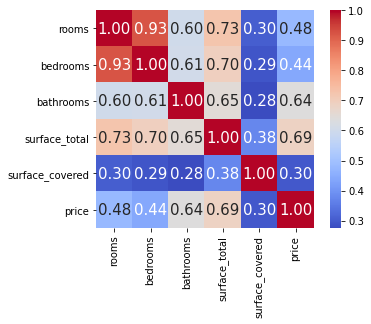

In [17]:
#Antes de armar nuestro modelo de regresion, veamos las correlaciones
import seaborn as sns
corr = dp_filtrado.corr()
sns.heatmap(corr, cbar = True, square = True, annot = True, fmt = '.2f', annot_kws = {'size': 15}, cmap = 'coolwarm')

In [18]:
#Importemos las librerias
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [19]:
X = dp_filtrado[["rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered"]] #Seleccionamos las variables predictoras
y = dp_filtrado.price #Defino el Target

In [20]:
#Separo en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [21]:
#Generamos el modelo de Regresión Lineal
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

In [22]:
#Fiteo el modelo
linear_model.fit(X_train,y_train)

LinearRegression()

In [23]:
#Evaluamos el modelo
from sklearn.metrics import mean_squared_error
modelo = ['Regresion lineal']

for i, model in enumerate ([linear_model]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict (X_test)
    
    print(f'Modelo benchmark: {modelo[i]}')
    
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raiz del error cuadratico medio en train: {rmse_train}')
    print(f'Raiz del error cuadratico medio en test: {rmse_test}')

Modelo benchmark: Regresion lineal
Raiz del error cuadratico medio en train: 199173.83253528475
Raiz del error cuadratico medio en test: 202449.36540361593


### Modelo de árbol de decisión y de vecinos cercanos

In [24]:
#Ahora vamos a entrenar un modelo de árbol de decisión y de vecinos cercanos
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [25]:
#Creamos los modelos
tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=5)

In [26]:
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [27]:
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor()

In [28]:
#Realizamos la prediccion y calculamos el RMSE de los modelos generados
modelos = ['Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(f'Modelo: {modelos[i]}')
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 191783.485243933
Raíz del error cuadrático medio en Test: 194688.15091192327
Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 121300.24049431273
Raíz del error cuadrático medio en Test: 155040.1332898459


**Para pensar**: ¿Qué podemos hacer para mejorar nuestro modelo? 

In [29]:
#Una opcion seria probar con menos features por ejmplo:
X = dp_filtrado[["bathrooms", "surface_total"]]
y = dp_filtrado.price

In [30]:
#Realizamos un train/ test de los datos
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [31]:
#Importamos la regresión lineal
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

In [32]:
linear_model.fit(X_train,y_train)

LinearRegression()

Aplicamos el fit. 

In [33]:
#Evaluamos el modelo
from sklearn.metrics import mean_squared_error
modelo = ['Regresion lineal']

for i, model in enumerate ([linear_model]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict (X_test)
    
    print(f'Modelo benchmark: {modelo[i]}')
    
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raiz del error cuadratico medio en train: {rmse_train}')
    print(f'Raiz del error cuadratico medio en test: {rmse_test}')

Modelo benchmark: Regresion lineal
Raiz del error cuadratico medio en train: 203015.35633339902
Raiz del error cuadratico medio en test: 205955.81413686275


**Aclaración**: No se aprecian mejoras significativas sobre el modelo generado

### Modelo de Clasificación

In [34]:
#Punto 10)
from sklearn.model_selection import train_test_split #Importamos la libreria para separar en train y test

#Me quedo con 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

In [35]:
#Punto 11)
from sklearn.tree import DecisionTreeClassifier #Importamos el modelo
tree = DecisionTreeClassifier(max_depth=2, random_state = 42) #Creamos el modelo

In [36]:
#Punto 12)
tree.fit(X_train,y_train) #Entrenamos el modelo

DecisionTreeClassifier(max_depth=2, random_state=42)

In [37]:
#Punto 13)
y_train_pred = tree.predict(X_train) #Prediccion en Train
y_test_pred = tree.predict(X_test) #Prediccion en Test

In [38]:
#Punto 14) 
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.027348227037892546
% de aciertos sobre el set de evaluación: 0.028017773389286595


c:\Users\n_sar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


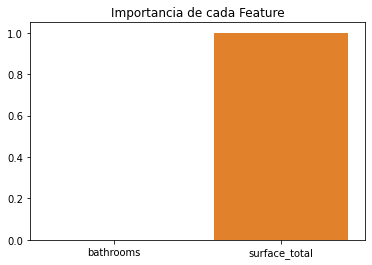

In [39]:
#Punto 15)
import seaborn as sns

importances = tree.feature_importances_
columns = X.columns
sns.barplot(columns, importances)
plt.title('Importancia de cada Feature')
plt.show()

### Otra conclusión

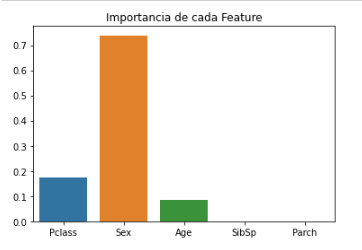

**Conclusión**

Como resumen general del Workshop, podemos observar que para la clasificación del modelo en base a la variable target: Survived, los features más importantes son: Sex, seguido de Pclass y luego de Age. 

Por último,  se observa una performance parecida en la métrica de Accuracy para los datos de Train y de Test, en lo que respecta al % de aciertos del modelo. 